## Observations and Insights 

In [188]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import linregress
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_data_complete = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])
mouse_data_complete
# Display the data table for preview


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [189]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 



In [190]:
mouse_data_complete["Mouse ID"].value_counts()

g989    13
q597    10
z795    10
c139    10
g791    10
        ..
h428     1
l872     1
n482     1
x336     1
x226     1
Name: Mouse ID, Length: 249, dtype: int64

In [191]:
# Optional: Get all the data for the duplicate mouse ID. 



In [192]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.


mouse_data_complete = mouse_data_complete.drop_duplicates()
mouse_data_complete

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [193]:
# Checking the number of mice in the clean DataFrame.
mouse_data_complete["Mouse ID"].value_counts()


g989    12
q597    10
z795    10
c139    10
g791    10
        ..
h428     1
l872     1
n482     1
x336     1
x226     1
Name: Mouse ID, Length: 249, dtype: int64

In [194]:
mouse_data_complete["Drug Regimen"].unique()

array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

## Summary Statistics

In [195]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.

ramicane = mouse_data_complete.loc[(mouse_data_complete["Drug Regimen"] == "Ramicane")]
capomulin = mouse_data_complete.loc[(mouse_data_complete["Drug Regimen"] == "Capomulin")]
infubinol = mouse_data_complete.loc[(mouse_data_complete["Drug Regimen"]== "Infubinol")]
placebo = mouse_data_complete.loc[(mouse_data_complete["Drug Regimen"]== "Placebo")]
ceftamin = mouse_data_complete.loc[(mouse_data_complete["Drug Regimen"]== "Ceftamin")]
stelasyn = mouse_data_complete.loc[(mouse_data_complete["Drug Regimen"]== "Stelasyn")] 
zoniferol = mouse_data_complete.loc[(mouse_data_complete["Drug Regimen"]== "Zoniferol")]
ketapril = mouse_data_complete.loc[(mouse_data_complete["Drug Regimen"]== "Ketapril")]
propriva = mouse_data_complete.loc[(mouse_data_complete["Drug Regimen"]== "Propriva")]
naftisol = mouse_data_complete.loc[(mouse_data_complete["Drug Regimen"]== "Naftisol")]

ramicane.head()





,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [196]:
ram_stat = ramicane.agg(['mean', 'median', 'var', 'std', 'sem'])

tumor_ram_stat = ram_stat["Tumor Volume (mm3)"]

tumor_ram_stat

mean      40.216745
median    40.673236
var       23.486704
std        4.846308
sem        0.320955
Name: Tumor Volume (mm3), dtype: float64

In [197]:
capo_stat = capomulin.agg(['mean', 'median', 'var', 'std', 'sem'])

tumor_capo_stat = capo_stat["Tumor Volume (mm3)"]

tumor_capo_stat

mean      40.675741
median    41.557809
var       24.947764
std        4.994774
sem        0.329346
Name: Tumor Volume (mm3), dtype: float64

In [198]:
infu_stat = infubinol.agg(['mean', 'median', 'var', 'std', 'sem'])

tumor_infu_stat = infu_stat["Tumor Volume (mm3)"]

tumor_infu_stat

mean      52.884795
median    51.820584
var       43.128684
std        6.567243
sem        0.492236
Name: Tumor Volume (mm3), dtype: float64

In [199]:
placebo_stat = placebo.agg(['mean', 'median', 'var', 'std', 'sem'])
placebo_infu_stat = placebo_stat["Tumor Volume (mm3)"]

placebo_infu_stat

mean      54.033581
median    52.288934
var       61.168083
std        7.821003
sem        0.581331
Name: Tumor Volume (mm3), dtype: float64

In [200]:
ceft_stat = ceftamin.agg(['mean', 'median', 'var', 'std', 'sem'])
tumor_ceft_stat = ceft_stat["Tumor Volume (mm3)"]

tumor_ceft_stat

mean      52.591172
median    51.776157
var       39.290177
std        6.268188
sem        0.469821
Name: Tumor Volume (mm3), dtype: float64

In [201]:
stel_stat = stelasyn.agg(['mean', 'median', 'var', 'std', 'sem'])
tumor_stel_stat = stel_stat["Tumor Volume (mm3)"]

tumor_stel_stat

mean      54.233149
median    52.431737
var       59.450562
std        7.710419
sem        0.573111
Name: Tumor Volume (mm3), dtype: float64

In [202]:
zon_stat = zoniferol.agg(['mean', 'median', 'var', 'std', 'sem'])
tumor_zon_stat = zon_stat["Tumor Volume (mm3)"]

tumor_zon_stat

mean      53.236507
median    51.818479
var       48.533355
std        6.966589
sem        0.516398
Name: Tumor Volume (mm3), dtype: float64

In [203]:
keta_stat = ketapril.agg(['mean', 'median', 'var', 'std', 'sem'])
tumor_keta_stat = keta_stat["Tumor Volume (mm3)"]

tumor_keta_stat

mean      55.235638
median    53.698743
var       68.553577
std        8.279709
sem        0.603860
Name: Tumor Volume (mm3), dtype: float64

In [204]:
prop_stat = propriva.agg(['mean', 'median', 'var', 'std', 'sem'])
tumor_prop_stat = infu_stat["Tumor Volume (mm3)"]

tumor_prop_stat

mean      52.884795
median    51.820584
var       43.128684
std        6.567243
sem        0.492236
Name: Tumor Volume (mm3), dtype: float64

In [205]:
naf_stat = naftisol.agg(['mean', 'median', 'var', 'std', 'sem'])
tumor_naf_stat = naf_stat["Tumor Volume (mm3)"]

tumor_naf_stat

mean      54.331565
median    52.509285
var       66.173479
std        8.134708
sem        0.596466
Name: Tumor Volume (mm3), dtype: float64

In [206]:
stat_table_df = pd.DataFrame({"Regimen": ["Ramicane", "Capomulin","Infubinol","Placebo","Ceftamin","Stelasyn","Zoniferol","Ketapril","Propriva","Naftisol"], 
                            "Mean Tumor Volume": ['40.2','40.7','52.9','54','52.6','54.2','53.2','55.2','52.9','54.3'],
                            "Median Tumor Volume":['40.7','41.6','51.8','52.3','51.8','52.4','51.8','53.7','51.8','52.5'],
                            "Variance in Volume":['23.5','24.9','43.1','61.2','39.3','59.5','48.5','68.6','43.1','66.2'],
                            "Standard Deviation":['4.8','5','6.6','7.8','6.3','7.7','7','8.3','6.6','8.1'],
                            "Standard Error":['.32','.33','.49','.58','.47','.57','.52','.6','.49','.6']})

stat_table_df

,Regimen,Mean Tumor Volume,Median Tumor Volume,Variance in Volume,Standard Deviation,Standard Error
0,Ramicane,40.2,40.7,23.5,4.8,.32
1,Capomulin,40.7,41.6,24.9,5,.33
2,Infubinol,52.9,51.8,43.1,6.6,.49
3,Placebo,54,52.3,61.2,7.8,.58
4,Ceftamin,52.6,51.8,39.3,6.3,.47
5,Stelasyn,54.2,52.4,59.5,7.7,.57
6,Zoniferol,53.2,51.8,48.5,7,.52
7,Ketapril,55.2,53.7,68.6,8.3,.6
8,Propriva,52.9,51.8,43.1,6.6,.49
9,Naftisol,54.3,52.5,66.2,8.1,.6


In [207]:
mouse_data_new = mouse_data_complete.rename(columns={'Tumor Volume (mm3)': 'tumorvol'})
mouse_data_new

all_tumormean = mouse_data_new.groupby('Drug Regimen').tumorvol.mean()

all_tumormean_df = pd.DataFrame(all_tumormean)

all_tumormean_df

all_tumormean_rename = all_tumormean_df.rename(columns={'tumorvol': 'Mean'})
all_tumormean_rename


,Mean
Drug Regimen,
Capomulin,40.675741
Ceftamin,52.591172
Infubinol,52.884795
Ketapril,55.235638
Naftisol,54.331565
Placebo,54.033581
Propriva,52.368318
Ramicane,40.216745
Stelasyn,54.233149


In [208]:
all_tumormedian = mouse_data_new.groupby('Drug Regimen').tumorvol.median()
all_tumormedian

all_tumormedian_df = pd.DataFrame(all_tumormedian)
all_tumormedian_df

all_tumormedian_rename = all_tumormedian_df.rename(columns={'tumorvol': 'Median'})
all_tumormedian_rename


,Median
Drug Regimen,
Capomulin,41.557809
Ceftamin,51.776157
Infubinol,51.820584
Ketapril,53.698743
Naftisol,52.509285
Placebo,52.288934
Propriva,50.909965
Ramicane,40.673236
Stelasyn,52.431737


In [209]:
all_tumorvar = mouse_data_new.groupby('Drug Regimen').tumorvol.var()
all_tumorvar_df = pd.DataFrame(all_tumorvar)

all_tumorvar_rename = all_tumorvar_df.rename(columns={'tumorvol': 'Variance'})
all_tumorvar_rename

,Variance
Drug Regimen,
Capomulin,24.947764
Ceftamin,39.290177
Infubinol,43.128684
Ketapril,68.553577
Naftisol,66.173479
Placebo,61.168083
Propriva,42.278090
Ramicane,23.486704
Stelasyn,59.450562


In [210]:
all_tumorstd = mouse_data_new.groupby('Drug Regimen').tumorvol.std()
all_tumorstd_df = pd.DataFrame(all_tumorstd)

all_tumorstd_rename = all_tumorstd_df.rename(columns={'tumorvol': 'StD'})
all_tumorstd_rename

,StD
Drug Regimen,
Capomulin,4.994774
Ceftamin,6.268188
Infubinol,6.567243
Ketapril,8.279709
Naftisol,8.134708
Placebo,7.821003
Propriva,6.502160
Ramicane,4.846308
Stelasyn,7.710419


In [211]:
all_tumorsem = mouse_data_new.groupby('Drug Regimen').tumorvol.sem()
all_tumorsem_df = pd.DataFrame(all_tumorsem)

all_tumorsem_rename = all_tumorsem_df.rename(columns={'tumorvol': 'Standard Error'})
all_tumorsem_rename

,Standard Error
Drug Regimen,
Capomulin,0.329346
Ceftamin,0.469821
Infubinol,0.492236
Ketapril,0.603860
Naftisol,0.596466
Placebo,0.581331
Propriva,0.514041
Ramicane,0.320955
Stelasyn,0.573111


In [212]:
meanmedian_df = pd.merge(all_tumormean_rename, all_tumormedian_rename, on=["Drug Regimen"], how = "outer" )
meanmedian_df

,Mean,Median
Drug Regimen,,
Capomulin,40.675741,41.557809
Ceftamin,52.591172,51.776157
Infubinol,52.884795,51.820584
Ketapril,55.235638,53.698743
Naftisol,54.331565,52.509285
Placebo,54.033581,52.288934
Propriva,52.368318,50.909965
Ramicane,40.216745,40.673236
Stelasyn,54.233149,52.431737


In [213]:
meanmedianvar = pd.merge(meanmedian_df, all_tumorvar_rename, on=["Drug Regimen"], how = "outer" )

meanmedianvar

meanmedianvarstd = pd.merge(meanmedianvar, all_tumorstd_rename, on=["Drug Regimen"], how = "outer" )

Allstats = pd.merge(meanmedianvarstd, all_tumorsem_rename, on=["Drug Regimen"], how = "outer" )

Allstats



,Mean,Median,Variance,StD,Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [214]:

#Pretty sure I  have taken way too many steps in that last problem. 
#Go back and use method Bill describes in video
#Figure out what's causing error


mouse_data_complete.head()
groupstats = mouse_data_complete.groupby("Drug Regimen").agg({(Tumor Volume (mm3)):["mean","median","var","std,"sem"]})
print (groupstats.head())

SyntaxError: invalid syntax (<ipython-input-214-d56389ae915a>, line 7)

## Bar and Pie Charts

<function matplotlib.pyplot.show(*args, **kw)>

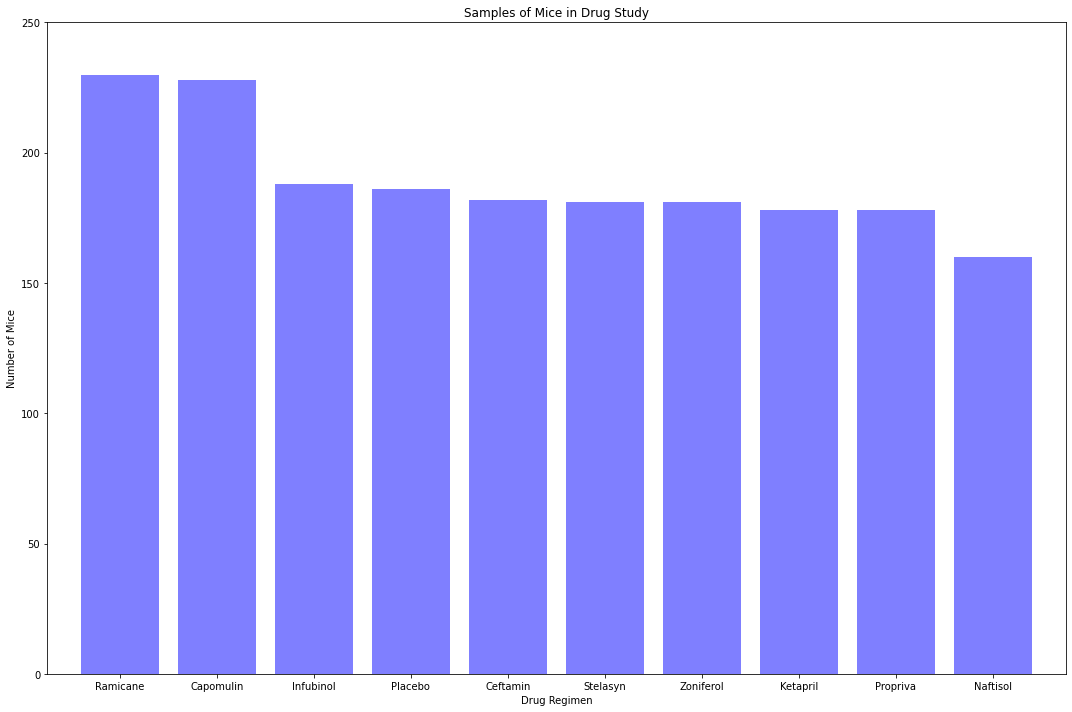

In [222]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

mouse_data_complete["Drug Regimen"].value_counts()
mice = [230, 228, 188, 186, 182, 181, 181, 178, 178, 160]
x_axis = np.arange(len(mice))

plt.figure(figsize=(15,10))
plt.bar(x_axis, mice, color='b', alpha=0.5, align="center")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Ramicane", "Capomulin", "Infubinol", "Placebo", "Ceftamin", "Stelasyn", "Zoniferol","Ketapril","Propriva","Naftisol"])
,
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(mice)+20)

plt.title("Samples of Mice in Drug Study")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")

plt.tight_layout()
plt.show

In [ ]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.



([<matplotlib.patches.Wedge at 0xc7bb128>,
 [Text(-0.7237151467475075, -0.8283938594462383, 'Females'),
  Text(0.7237152243073345, 0.8283937916871327, 'Males')],
 [Text(-0.3947537164077313, -0.45185119606158447, '49.4%'),
  Text(0.39475375871309154, 0.4518511591020723, '50.6%')])

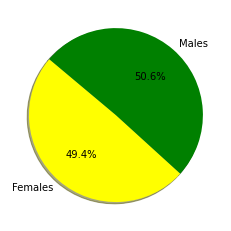

In [221]:


# Generate a pie plot showing the distribution of female versus male mice using pandas

mouse_data_complete.head()

mouse_data_complete["Sex"].value_counts()

#The values of each section of the pie chart
sizes = [934,958]

# The colors of each section of the pie chart
colors = ["yellow", "green"]

# Tells matplotlib to seperate the "Humans" section from the others
#explode = (0.1, 0, 0, 0)
# Labels for the sections of our pie chart
labels = ["Females", "Males"]

plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [224]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

drug_list = ["Capomulin","Ramicane","Infubinol","Ceftamin"]

# Start by getting the last (greatest) timepoint for each mouse

grouped = mouse_data_complete.groupby('Mouse ID').max()

grouped_df = pd.DataFrame(grouped)

new_index_grouped_df = grouped_df.reset_index()
new_index_grouped_df.head()

miceformerge = pd.DataFrame(new_index_grouped_df[["Mouse ID","Timepoint"]])

miceformerge


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

lasttimepoint = pd.merge(miceformerge, mouse_data_complete, how="left", on=["Mouse ID", "Timepoint"])

lasttimepoint.head()

                                             
#capomulin = lasttimepoint.loc[(lasttimepoint["Drug Regimen"] == "Capomulin")]
#capomulin_df = pd.DataFrame(capomulin)
#capomulin_df





,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


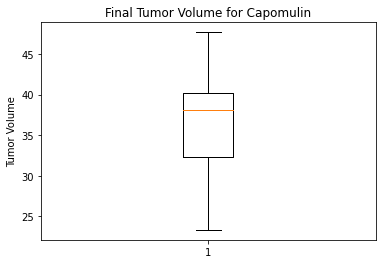

The lower quartile of temperatures is: 32.37735684
The upper quartile of temperatures is: 40.1592203
The interquartile range of temperatures is: 7.781863460000004
The the median of temperatures is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [220]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


capomulin = lasttimepoint.loc[(lasttimepoint["Drug Regimen"] == "Capomulin")]
capomulin_df = pd.DataFrame(capomulin)
capomulin_df.head()

captumorvolume = capomulin_df["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume for Capomulin')
ax1.set_ylabel('Tumor Volume')
ax1.boxplot(captumorvolume)
plt.show()

quartiles = captumorvolume.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
            
#for drug in drug_list: 
    
    #lasttimepoint.loc[(lasttimepoint["Tumor Volume (mm3)"])]

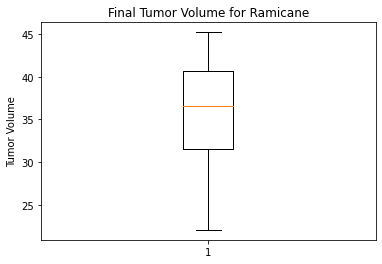

The lower quartile of temperatures is: 31.56046955
The upper quartile of temperatures is: 40.65900627
The interquartile range of temperatures is: 9.098536719999998
The the median of temperatures is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [219]:
ramicane = lasttimepoint.loc[(lasttimepoint["Drug Regimen"] == "Ramicane")]
ramicane_df = pd.DataFrame(ramicane)
ramicane_df.head()

ramtumorvolume = ramicane_df["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume for Ramicane')
ax1.set_ylabel('Tumor Volume')
ax1.boxplot(ramtumorvolume)
plt.show()

quartiles = ramtumorvolume.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

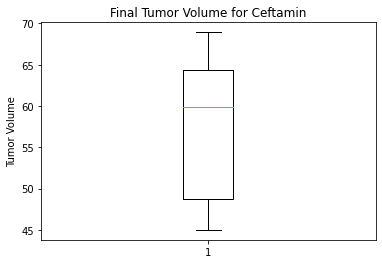

The lower quartile of temperatures is: 48.72207785
The upper quartile of temperatures is: 64.29983003
The interquartile range of temperatures is: 15.577752179999997
The the median of temperatures is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


In [218]:
ceftamin = lasttimepoint.loc[(lasttimepoint["Drug Regimen"] == "Ceftamin")]
ceftamin = pd.DataFrame(ceftamin)
ceftamin_df.head()

ceftumorvolume = ceftamin_df["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume for Ceftamin')
ax1.set_ylabel('Tumor Volume')
ax1.boxplot(ceftumorvolume)
plt.show()

quartiles = ceftumorvolume.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

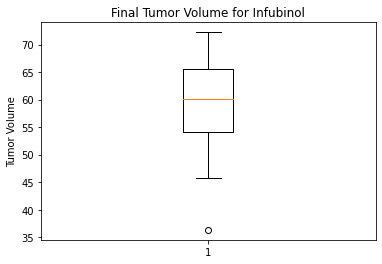

The lower quartile of temperatures is: 54.04860769
The upper quartile of temperatures is: 65.52574285
The interquartile range of temperatures is: 11.477135160000003
The the median of temperatures is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [217]:
infubinol = lasttimepoint.loc[(lasttimepoint["Drug Regimen"] == "Infubinol")]
infubinol = pd.DataFrame(infubinol)
infubinol.head()

inftumorvolume = infubinol["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume for Infubinol')
ax1.set_ylabel('Tumor Volume')
ax1.boxplot(inftumorvolume)
plt.show()

quartiles = inftumorvolume.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume')

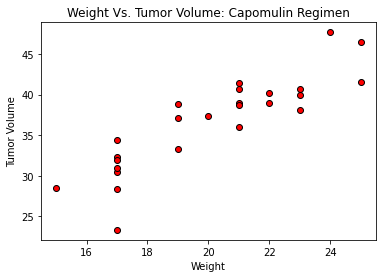

In [216]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

capomulin = lasttimepoint.loc[(lasttimepoint["Drug Regimen"] == "Capomulin")]
capomulin_df = pd.DataFrame(capomulin)
capomulin_df.head()

captumorvolume = capomulin_df["Tumor Volume (mm3)"]
weight = capomulin_df["Weight (g)"]

plt.scatter(weight, captumorvolume, marker="o", facecolors="red", edgecolors="black")

# Create a title, x label, and y label for our chart
plt.title("Weight Vs. Tumor Volume: Capomulin Regimen")
plt.xlabel("Weight")
plt.ylabel("Tumor Volume")





## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

correlation = st.pearsonr(weight,captumorvolume)
print(f"The correlation between both factors is {round(correlation[0],2)}")


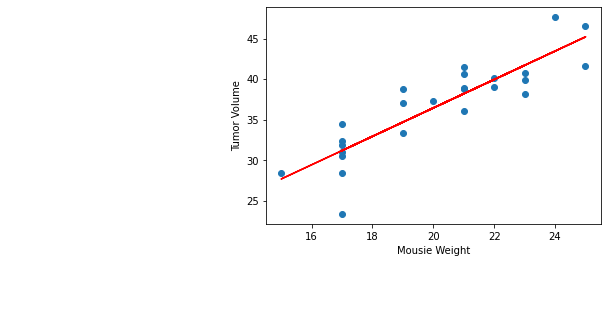

In [215]:
captumorvolume = capomulin_df["Tumor Volume (mm3)"]
weight = capomulin_df["Weight (g)"]

#x_values = housing_data['RM']
x_values = weight
#y_values = housing_data['MEDV']
y_values = captumorvolume
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Mousie Weight')
plt.ylabel('Tumor Volume')
plt.show()